# 4_IDA_Exam_Pre_processing_Model_Training_one_hot_feature_selected

Ähnliches Vorgehen wie bei 2_IDA_Exam_Pre_processing_Model_Training_numeric_feature_selected nur dieses mal mit one hot encoded

Inhalt:

- Data Preprocessing mit numerischer Umwandulung
- Feature Selection
- Train , Tune und Validate Models
- Test Final Model
- EDA der neuen Daten

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('einkommen.train', sep=",", na_values = " ?", header=None)

columns = ["Age", "Employment_type", "Interview_dependent", "Education_level", "Schooling/training_period", "Marital_Status", "Employment_area", "Partnership", "Ethnicity", "Gender", "Gains", "Losses", "Working_time_Weekly", "Country", "Income"]
df.columns = columns

In [3]:
key = df["Income"].isnull()  #https://stackoverflow.com/questions/36525020/how-to-filter-na-values-and-add-it-to-a-new-dataframe
df_25000 = df.loc[key]
df_5000 = df.loc[~key] # not na value

In [4]:
df_copy_new=df.copy()

# Löschen unwichtiger Features/Spalten

In [5]:
del df_copy_new['Country']

In [6]:
del df_copy_new['Ethnicity']

In [7]:
# counting unique items
item_counts = df_copy_new["Employment_type"].value_counts()
print(item_counts) #max value nehmen

 Private             20901
 Self-emp-not-inc     2363
 Local-gov            1928
 State-gov            1189
 Self-emp-inc         1037
 Federal-gov           887
 Without-pay            13
 Never-worked            5
Name: Employment_type, dtype: int64


In [8]:
item_counts = df_copy_new["Employment_area"].value_counts()
print(item_counts) #median nehmen 

 Prof-specialty       3802
 Craft-repair         3784
 Exec-managerial      3736
 Adm-clerical         3507
 Sales                3370
 Other-service        3044
 Machine-op-inspct    1846
 Transport-moving     1473
 Handlers-cleaners    1252
 Farming-fishing       913
 Tech-support          856
 Protective-serv       583
 Priv-house-serv       144
 Armed-Forces            8
Name: Employment_area, dtype: int64


# Filling Missing Values für  Employment_type und Employment area

In [9]:
# replacing values https://www.geeksforgeeks.org/how-to-convert-categorical-variable-to-numeric-in-pandas/
labels = df_copy_new["Employment_type"].dropna().unique()
print(labels)
df_copy_new['Employment_type'].replace(labels,
                        list(range(1,len(labels)+1)), inplace=True) # +1 damit wir letzets Element bekommen

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [10]:
df_copy_new["Employment_type"]=df_copy_new["Employment_type"].fillna(3.0)

# Converting numeric to object back Employment_type and FILL NA

In [11]:
# replacing values https://www.geeksforgeeks.org/how-to-convert-categorical-variable-to-numeric-in-pandas/
#labels = df_copy_new["Employment_type"].dropna().unique()
#print(labels)
df_copy_new['Employment_type'].replace(list(range(1,len(labels)+1)),labels, inplace=True) 
# +1 damit wir letzets Element bekommen

In [12]:
item_counts = df_copy_new["Employment_type"].value_counts()
print(item_counts) #max value nehmen

 Private             22578
 Self-emp-not-inc     2363
 Local-gov            1928
 State-gov            1189
 Self-emp-inc         1037
 Federal-gov           887
 Without-pay            13
 Never-worked            5
Name: Employment_type, dtype: int64


In [13]:
item_counts = df_copy_new["Employment_area"].value_counts()
print(item_counts) 

 Prof-specialty       3802
 Craft-repair         3784
 Exec-managerial      3736
 Adm-clerical         3507
 Sales                3370
 Other-service        3044
 Machine-op-inspct    1846
 Transport-moving     1473
 Handlers-cleaners    1252
 Farming-fishing       913
 Tech-support          856
 Protective-serv       583
 Priv-house-serv       144
 Armed-Forces            8
Name: Employment_area, dtype: int64


In [14]:
labels = df_copy_new["Employment_area"].dropna().unique()
print(labels)
df_copy_new['Employment_area'].replace(labels,
                        list(range(1,len(labels)+1)), inplace=True) # +1 damit wir letzets Element bekommen

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


In [15]:
df_copy_new["Employment_area"]=df_copy_new["Employment_area"].fillna(10.0)

In [16]:
item_counts = df_copy_new["Employment_area"].value_counts()
print(item_counts) 

4.0     3802
7.0     3784
2.0     3736
10.0    3528
1.0     3507
6.0     3370
5.0     3044
8.0     1473
3.0     1252
9.0      913
11.0     856
12.0     583
14.0     144
13.0       8
Name: Employment_area, dtype: int64


In [17]:
df_copy_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        30000 non-null  int64  
 1   Employment_type            30000 non-null  object 
 2   Interview_dependent        30000 non-null  int64  
 3   Education_level            30000 non-null  object 
 4   Schooling/training_period  30000 non-null  int64  
 5   Marital_Status             30000 non-null  object 
 6   Employment_area            30000 non-null  float64
 7   Partnership                30000 non-null  object 
 8   Gender                     30000 non-null  object 
 9   Gains                      30000 non-null  int64  
 10  Losses                     30000 non-null  int64  
 11  Working_time_Weekly        30000 non-null  int64  
 12  Income                     5000 non-null   object 
dtypes: float64(1), int64(6), object(6)
memory usag

In [18]:
df_copy_new['Employment_area'].replace(list(range(1,len(labels)+1)),labels, inplace=True) 
# +1 damit wir letzets Element bekommen

In [19]:
item_counts = df_copy_new["Employment_area"].value_counts()
print(item_counts) #max value nehmen

 Prof-specialty       3802
 Craft-repair         3784
 Exec-managerial      3736
 Machine-op-inspct    3528
 Adm-clerical         3507
 Sales                3370
 Other-service        3044
 Transport-moving     1473
 Handlers-cleaners    1252
 Farming-fishing       913
 Tech-support          856
 Protective-serv       583
 Priv-house-serv       144
 Armed-Forces            8
Name: Employment_area, dtype: int64


In [20]:
df_copy_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        30000 non-null  int64 
 1   Employment_type            30000 non-null  object
 2   Interview_dependent        30000 non-null  int64 
 3   Education_level            30000 non-null  object
 4   Schooling/training_period  30000 non-null  int64 
 5   Marital_Status             30000 non-null  object
 6   Employment_area            30000 non-null  object
 7   Partnership                30000 non-null  object
 8   Gender                     30000 non-null  object
 9   Gains                      30000 non-null  int64 
 10  Losses                     30000 non-null  int64 
 11  Working_time_Weekly        30000 non-null  int64 
 12  Income                     5000 non-null   object
dtypes: int64(6), object(7)
memory usage: 3.0+ MB


# One hot encoding

One hot entcoded da bei numerical das Model denkt das eien größere Zahlen als Klasse es wichtiger ist 

In [21]:
#https://stackoverflow.com/questions/58101126/using-scikit-learn-onehotencoder-with-a-pandas-dataframe
#https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/


df_copy_new= pd.get_dummies(df_copy_new,prefix=['Employment_type'], columns = ['Employment_type'], drop_first=True)

In [22]:
df_copy_new= pd.get_dummies(df_copy_new,prefix=['Education_level'], columns = ['Education_level'], drop_first=True)

In [23]:
df_copy_new= pd.get_dummies(df_copy_new,prefix=['Marital_Status'], columns = ['Marital_Status'], drop_first=True)

In [24]:
df_copy_new= pd.get_dummies(df_copy_new,prefix=['Employment_area'], columns = ['Employment_area'], drop_first=True)

In [25]:
df_copy_new= pd.get_dummies(df_copy_new,prefix=['Partnership'], columns = ['Partnership'], drop_first=True)

In [26]:
df_copy_new= pd.get_dummies(df_copy_new,prefix=['Gender'], columns = ['Gender'], drop_first=True)

Alle Diskretenwerte wurden durch one hot encoding umgewandelt

# Remove Duplicates

In [27]:
df_copy_new= df_copy_new.drop_duplicates(keep='first')

# Splitting data and label

In [28]:
key = df_copy_new["Income"].isnull()  #https://stackoverflow.com/questions/36525020/how-to-filter-na-values-and-add-it-to-a-new-dataframe
df_25000 = df_copy_new.loc[key]
df_5000 = df_copy_new.loc[~key] # not na value

# Converting Income into Numeric

In [29]:
labels = df_5000["Income"].dropna().unique()
print(labels)
df_5000['Income'].replace(labels,
                        list(range(0,len(labels))), inplace=True) # range(0) damit wir label 0 -1 haben

[' <=50K' ' >50K']


/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


# Feature Selection

In [30]:
label = df_5000['Income']
df_x = df_5000.drop(columns=['Income'])

In [31]:
label=label.astype(bool) 

In [32]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [33]:

X_train, X_test, y_train, y_test = train_test_split(df_x , label, test_size=.33, random_state=42)

tree = RandomForestClassifier()
tree.fit(X_train, y_train)

importances = tree.feature_importances_

Feature: 0, Score: 0.14541
Feature: 1, Score: 0.14288
Feature: 2, Score: 0.07640
Feature: 3, Score: 0.09340
Feature: 4, Score: 0.02823
Feature: 5, Score: 0.08862
Feature: 6, Score: 0.00717
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.01616
Feature: 9, Score: 0.00870
Feature: 10, Score: 0.01072
Feature: 11, Score: 0.00547
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00233
Feature: 14, Score: 0.00067
Feature: 15, Score: 0.00039
Feature: 16, Score: 0.00067
Feature: 17, Score: 0.00295
Feature: 18, Score: 0.00153
Feature: 19, Score: 0.00322
Feature: 20, Score: 0.00453
Feature: 21, Score: 0.01184
Feature: 22, Score: 0.00418
Feature: 23, Score: 0.00866
Feature: 24, Score: 0.00578
Feature: 25, Score: 0.00005
Feature: 26, Score: 0.00598
Feature: 27, Score: 0.00805
Feature: 28, Score: 0.00008
Feature: 29, Score: 0.11227
Feature: 30, Score: 0.00184
Feature: 31, Score: 0.03143
Feature: 32, Score: 0.00143
Feature: 33, Score: 0.00196
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00916
Fe

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

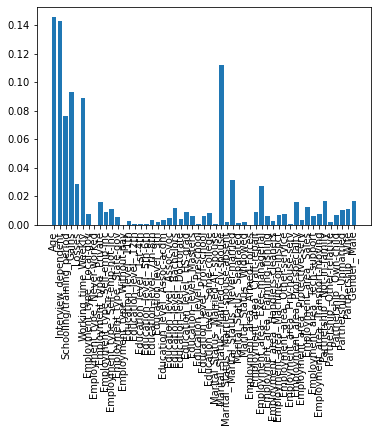

In [34]:
# summarize feature importance
for i,v in enumerate(importances):
    print('Feature: %0d, Score: %.5f' % (i,v))
#plot feature importance
#plt.bar([x for x in range(len(importances))], importances)
plt.bar(df_x.columns,importances)
plt.xticks(rotation=90)

In [35]:
features_value, features_name = zip(*sorted(zip(importances, df_x.columns),reverse=True))

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

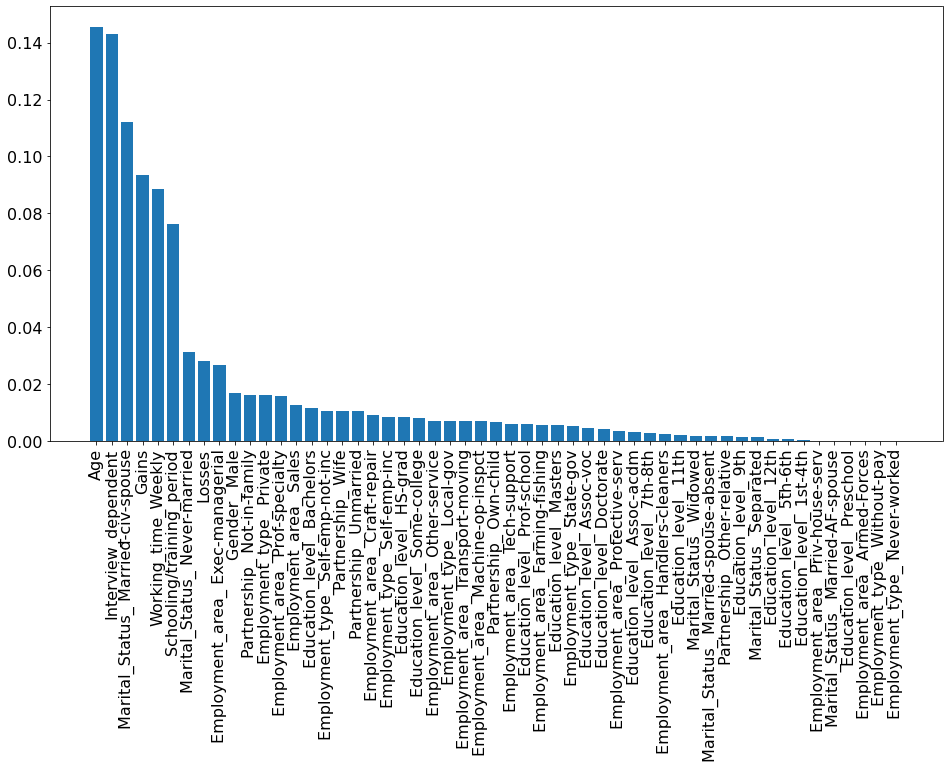

In [36]:
fig = plt.figure(figsize=(16,8))
plt.rcParams['font.size'] = 16
plt.bar(features_name,features_value)
plt.xticks(rotation=90)

In [37]:
important_features= features_name[:6]

In [38]:
important_features

('Age',
 'Interview_dependent',
 'Marital_Status_ Married-civ-spouse',
 'Gains',
 'Working_time_Weekly',
 'Schooling/training_period')

Es wurden die ersten 6 features genomme, da der score nach dem 6 viel schwächer ist

# Splitting Data and inport important features

In [39]:
df_y=label.astype(int) 
df_y= pd.Series(df_y,name="Income")

df_y.to_frame()

,Income
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,1
4997,1
4998,0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.30, random_state=42)

Date wurde auf train und gtest gesplitet ( 80% u. 20% )
- Trainingsdaten nochmal gesplittet für HP tunen. ( 70 % u. 30%)

In [41]:
important_features=list(important_features)
print(important_features)
print(type(important_features))

['Age', 'Interview_dependent', 'Marital_Status_ Married-civ-spouse', 'Gains', 'Working_time_Weekly', 'Schooling/training_period']
<class 'list'>


In [42]:
X_train_features = X_train[important_features]

X_valid_features = X_valid[important_features]
X_test_features = X_test[important_features]

# Model Selection ( Training, Tuning Hyperparameter and Validate)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Random Forest

In [44]:
from sklearn import metrics
cv = KFold(n_splits=5,)
n_estimators_range= list(range(1, 101)) #107
#max_depth_range=list(range(1,6)) # weniger tiefe weil wie viele Bäume haben  
list_scores = []
list_stds= []
for n in n_estimators_range:
    RFC = RandomForestClassifier(n_estimators=n,max_depth=4, random_state=0)
    scores = cross_val_score(RFC ,X_train_features, y_train, scoring='accuracy', cv=cv)
    print('Train Accuracy:%d %.3f (%.3f)' % (n,mean(scores), std(scores)))
    list_scores.append(mean(scores))
    list_stds.append(std(scores))
        

#print(list_scores)
max_value = max(list_scores) #Return the max value of the list.
max_index = list_scores.index(max_value) #Find the index of the max value.
print(max_index)

Train Accuracy:1 0.824 (0.007)
Train Accuracy:2 0.822 (0.009)
Train Accuracy:3 0.820 (0.010)
Train Accuracy:4 0.829 (0.006)
Train Accuracy:5 0.826 (0.008)
Train Accuracy:6 0.829 (0.007)
Train Accuracy:7 0.828 (0.004)
Train Accuracy:8 0.829 (0.005)
Train Accuracy:9 0.829 (0.006)
Train Accuracy:10 0.827 (0.007)
Train Accuracy:11 0.831 (0.005)
Train Accuracy:12 0.830 (0.008)
Train Accuracy:13 0.829 (0.008)
Train Accuracy:14 0.831 (0.007)
Train Accuracy:15 0.828 (0.012)
Train Accuracy:16 0.830 (0.009)
Train Accuracy:17 0.831 (0.009)
Train Accuracy:18 0.828 (0.012)
Train Accuracy:19 0.828 (0.010)
Train Accuracy:20 0.827 (0.012)
Train Accuracy:21 0.829 (0.009)
Train Accuracy:22 0.829 (0.009)
Train Accuracy:23 0.830 (0.008)
Train Accuracy:24 0.829 (0.010)
Train Accuracy:25 0.830 (0.007)
Train Accuracy:26 0.831 (0.008)
Train Accuracy:27 0.830 (0.008)
Train Accuracy:28 0.831 (0.006)
Train Accuracy:29 0.832 (0.007)
Train Accuracy:30 0.832 (0.006)
Train Accuracy:31 0.831 (0.008)
Train Accuracy:32

Text(0, 0.5, 'Cross-Validated Accuracy')

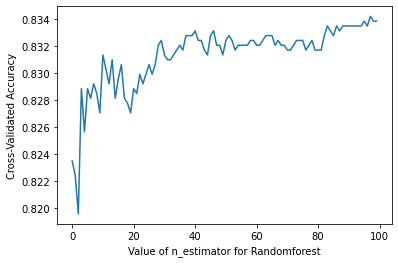

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(list(range(100)),list_scores)
plt.xlabel('Value of n_estimator for Randomforest')
plt.ylabel('Cross-Validated Accuracy')

 Bester Paramter ist 98 bei n_estimator

In [46]:
RFC = RandomForestClassifier(n_estimators=98,max_depth=4, random_state=0)
RFC.fit(X_train_features, y_train)
y_pred = RFC.predict(X_valid_features)
acc_score = accuracy_score(y_valid,y_pred)  
print ("Validation Accuracy: %.3f" % (acc_score))

Validation Accuracy: 0.845


In [47]:
from sklearn import metrics
print ("Confusion Matrix: \n " , confusion_matrix(y_valid,y_pred))
print()
print("Precision: %.3f" % (metrics.precision_score(y_valid, y_pred)))
print("Recall: %.3f" % (metrics.recall_score(y_valid, y_pred)))
print("F-1-Score: %.3f" % ( metrics.f1_score(y_valid, y_pred)))

Confusion Matrix: 
  [[880  49]
 [137 134]]

Precision: 0.732
Recall: 0.494
F-1-Score: 0.590


# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
max_depth_range=list(range(1,54))  
list_scores = []
list_stds= []
for md in max_depth_range:
    clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=md) 
    scores = cross_val_score(clf_tree ,X_train_features, y_train, scoring='accuracy', cv=cv)
    print('Train Accuracy:%d %.3f (%.3f)' % (md,mean(scores), std(scores)))
    list_scores.append(mean(scores))
    list_stds.append(std(scores))
        

max_value = max(list_scores) #Return the max value of the list.
max_index = list_scores.index(max_value) #Find the index of the max value.
print(max_index)

Train Accuracy:1 0.748 (0.015)
Train Accuracy:2 0.796 (0.009)
Train Accuracy:3 0.831 (0.010)
Train Accuracy:4 0.834 (0.009)
Train Accuracy:5 0.831 (0.009)
Train Accuracy:6 0.825 (0.006)
Train Accuracy:7 0.823 (0.008)
Train Accuracy:8 0.818 (0.011)
Train Accuracy:9 0.813 (0.017)
Train Accuracy:10 0.806 (0.012)
Train Accuracy:11 0.800 (0.018)
Train Accuracy:12 0.802 (0.012)
Train Accuracy:13 0.795 (0.006)
Train Accuracy:14 0.798 (0.019)
Train Accuracy:15 0.795 (0.013)
Train Accuracy:16 0.791 (0.018)
Train Accuracy:17 0.791 (0.011)
Train Accuracy:18 0.791 (0.020)
Train Accuracy:19 0.793 (0.010)
Train Accuracy:20 0.798 (0.009)
Train Accuracy:21 0.790 (0.013)
Train Accuracy:22 0.792 (0.009)
Train Accuracy:23 0.790 (0.012)
Train Accuracy:24 0.787 (0.011)
Train Accuracy:25 0.787 (0.011)
Train Accuracy:26 0.788 (0.011)
Train Accuracy:27 0.786 (0.014)
Train Accuracy:28 0.787 (0.010)
Train Accuracy:29 0.792 (0.015)
Train Accuracy:30 0.789 (0.016)
Train Accuracy:31 0.787 (0.011)
Train Accuracy:32

Text(0, 0.5, 'Cross-Validated Accuracy')

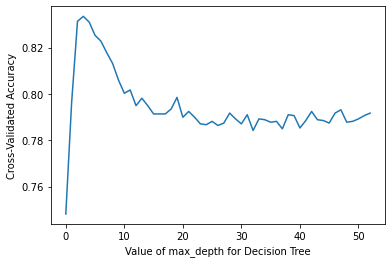

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(list(range(53)),list_scores)
plt.xlabel('Value of max_depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')

Bester Paramter für die anzahl der Bäume ist 4

In [50]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf_tree.fit(X_train_features, y_train)
y_pred = clf_tree.predict(X_valid_features)
acc_score = accuracy_score(y_valid,y_pred)  
print ("Validation Accuracy: %.3f" % (acc_score))

Validation Accuracy: 0.848


In [51]:
from sklearn import metrics
print ("Confusion Matrix: \n " , confusion_matrix(y_valid,y_pred))
print()
print("Precision: %.3f" % (metrics.precision_score(y_valid, y_pred)))
print("Recall: %.3f" % (metrics.recall_score(y_valid, y_pred)))
print("F-1-Score: %.3f" % ( metrics.f1_score(y_valid, y_pred)))

Confusion Matrix: 
  [[879  50]
 [132 139]]

Precision: 0.735
Recall: 0.513
F-1-Score: 0.604


# SVM Classifier

In [52]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
C_range=[100, 10, 1.0, 0.1, 0.001]
list_scores = []
list_stds= []
for c in C_range:
    svc  = make_pipeline(StandardScaler(), SVC(gamma='auto',C=c))
    scores = cross_val_score(svc ,X_train_features, y_train, scoring='accuracy', cv=cv)
    
    print('Train Accuracy:%.3f %.3f (%.3f)' % (c,mean(scores), std(scores)))
    list_scores.append(mean(scores))
    list_stds.append(std(scores))
        

max_value = max(list_scores) #Return the max value of the list.
max_index = list_scores.index(max_value) #Find the index of the max value.
print(max_index)
#beste immer Zahl plus 1 hier 2+1=3

Train Accuracy:100.000 0.819 (0.005)
Train Accuracy:10.000 0.827 (0.007)
Train Accuracy:1.000 0.829 (0.008)
Train Accuracy:0.100 0.817 (0.012)
Train Accuracy:0.001 0.748 (0.015)
2


Text(0, 0.5, 'Cross-Validated Accuracy')

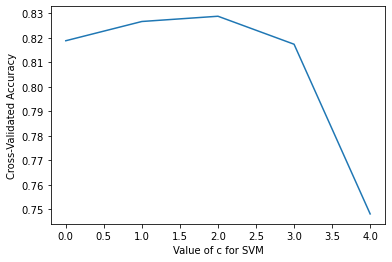

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(list(range(5)),list_scores)
plt.xlabel('Value of c for SVM')
plt.ylabel('Cross-Validated Accuracy')

Bester Parameter für C ist 1.0

In [54]:
svc  = make_pipeline(StandardScaler(), SVC(gamma='auto',C=1.0))
svc.fit(X_train_features,y_train)
y_pred = svc .predict(X_valid_features)
acc_score = accuracy_score(y_valid,y_pred)  
print ("Validation Accuracy: %.3f" % (acc_score))

Validation Accuracy: 0.844


In [55]:
from sklearn import metrics
print ("Confusion Matrix: \n " , confusion_matrix(y_valid,y_pred))
print()
print("Precision: %.3f" % (metrics.precision_score(y_valid, y_pred)))
print("Recall: %.3f" % (metrics.recall_score(y_valid, y_pred)))
print("F-1-Score: %.3f" % ( metrics.f1_score(y_valid, y_pred)))

Confusion Matrix: 
  [[877  52]
 [135 136]]

Precision: 0.723
Recall: 0.502
F-1-Score: 0.593


# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
C_range=[100, 10, 1.0, 0.1, 0.001]
list_scores = []
list_stds= []
for c in C_range:
    LoR = LogisticRegression(penalty="l2",C=c)
    scores = cross_val_score(LoR ,X_train_features, y_train, scoring='accuracy', cv=cv)
    
    print('Train Accuracy:%.3f %.3f (%.3f)' % (c,mean(scores), std(scores)))
    list_scores.append(mean(scores))
    list_stds.append(std(scores))
        

max_value = max(list_scores) #Return the max value of the list.
max_index = list_scores.index(max_value) #Find the index of the max value.
print(max_index)

Train Accuracy:100.000 0.785 (0.012)
Train Accuracy:10.000 0.785 (0.012)
Train Accuracy:1.000 0.785 (0.012)
Train Accuracy:0.100 0.784 (0.014)
Train Accuracy:0.001 0.789 (0.010)
4


/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'Cross-Validated Accuracy')

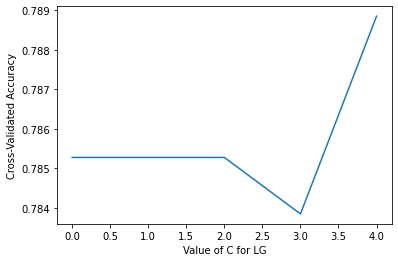

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(list(range(5)),list_scores)
plt.xlabel('Value of C for LG')
plt.ylabel('Cross-Validated Accuracy')

Bester Paramter für C ist 0.001

In [58]:
LoR = LogisticRegression(penalty="l2",C=0.001)
LoR.fit(X_train_features,y_train)
y_pred = LoR.predict(X_valid_features)
acc_score = accuracy_score(y_valid,y_pred)  
print ("Validation Accuracy: %.3f" % (acc_score))

Validation Accuracy: 0.797


In [59]:
from sklearn import metrics
print ("Confusion Matrix: \n " , confusion_matrix(y_valid,y_pred))
print()
print("Precision: %.3f" % (metrics.precision_score(y_valid, y_pred)))
print("Recall: %.3f" % (metrics.recall_score(y_valid, y_pred)))
print("F-1-Score: %.3f" % ( metrics.f1_score(y_valid, y_pred)))

Confusion Matrix: 
  [[908  21]
 [222  49]]

Precision: 0.700
Recall: 0.181
F-1-Score: 0.287


# Final Model Testing

Es wurde sich für Decision tree entschieden auf basis des F1 scores und der ACC

In [65]:
predictions = clf_tree.predict(X_test_features)

In [66]:
acc_score = accuracy_score(y_test,predictions)  
print ("Test Accuracy: %.3f" % (acc_score))
print()
print ("Confusion Matrix: \n " , confusion_matrix(y_test,predictions))
print()
print("Precision: %.3f" % (metrics.precision_score(y_test,predictions)))
print("Recall: %.3f" % (metrics.recall_score(y_test,predictions)))
print("F-1-Score: %.3f" % ( metrics.f1_score(y_test,predictions)))

Test Accuracy: 0.853

Confusion Matrix: 
  [[719  36]
 [111 134]]

Precision: 0.788
Recall: 0.547
F-1-Score: 0.646


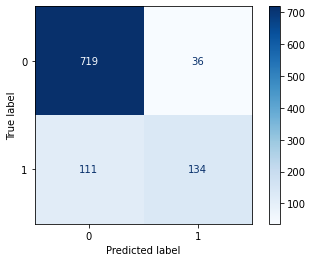

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       755
           1       0.79      0.55      0.65       245

    accuracy                           0.85      1000
   macro avg       0.83      0.75      0.78      1000
weighted avg       0.85      0.85      0.84      1000



In [67]:
#https://www.jcchouinard.com/confusion-matrix-in-scikit-learn/
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
plot_confusion_matrix(clf_tree, X_test_features, y_test, cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test,predictions))

# Ploting ROC und berechne AUC

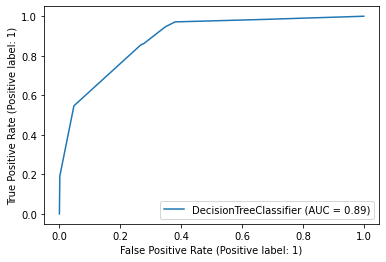

In [70]:
from sklearn import datasets, metrics, model_selection
metrics.plot_roc_curve(clf_tree, X_test_features, y_test) 

# It tells how much the model is capable of distinguishing between classes.
#Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.
#By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

In [71]:
X_25000_features = df_25000[important_features]

In [72]:
X_25000_features.shape

(24982, 6)

In [73]:
Final_predictions25000 = clf_tree.predict(X_25000_features)

In [74]:
df_Final_predictions25000= pd.DataFrame(Final_predictions25000, columns=['Income'])

In [75]:
df_Final_predictions25000

,Income
0,1
1,0
2,0
3,0
4,0
...,...
24977,0
24978,0
24979,0
24980,0


In [76]:
df_25000['Income'] = df_Final_predictions25000['Income'].values

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_6745/3759895927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_25000['Income'] = df_Final_predictions25000['Income'].values


In [77]:
frames_new = [df_25000,df_5000 ]

result_new = pd.concat(frames_new)

<AxesSubplot:xlabel='Income', ylabel='count'>

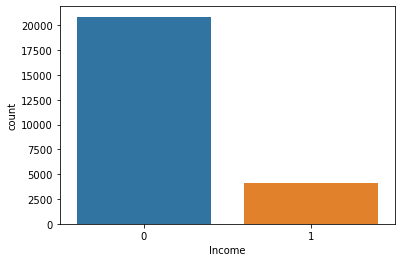

In [78]:
sns.countplot(x="Income",data=df_25000)

<AxesSubplot:xlabel='Income', ylabel='count'>

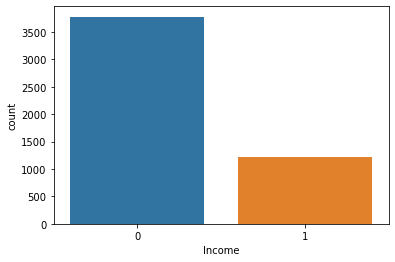

In [79]:
sns.countplot(x="Income",data=df_5000)

<AxesSubplot:xlabel='Income', ylabel='count'>

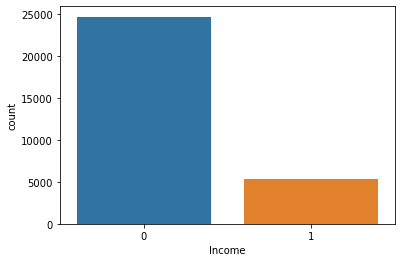

In [80]:
sns.countplot(x="Income",data=result_new)

In [81]:
print(df_25000["Income"].value_counts())
print(df_5000["Income"].value_counts())
print(result_new["Income"].value_counts())

0    20860
1     4122
Name: Income, dtype: int64
0    3778
1    1221
Name: Income, dtype: int64
0    24638
1     5343
Name: Income, dtype: int64


In [82]:
print(df_25000["Income"].value_counts()/len(df_25000))
print(df_5000["Income"].value_counts()/len(df_5000))
print(result_new["Income"].value_counts()/len(result_new))

0    0.835001
1    0.164999
Name: Income, dtype: float64
0    0.755751
1    0.244249
Name: Income, dtype: float64
0    0.821787
1    0.178213
Name: Income, dtype: float64


Wieder weniger 1 vorhergesagt